# 数据预处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
train_data = pd.read_csv("train.csv",index_col = 0)
test_data = pd.read_csv("test.csv",index_col = 0)
data = pd.concat([train_data,test_data],ignore_index=True) #ignore_index 索引拼接
#data.to_csv('data.csv', sep=',', header=True, index=True)


In [2]:
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
#无缺少值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [4]:
#删除同预测的y没有关系的列
data.drop(["id"],inplace=True,axis=1)

In [5]:
data.loc[data["Arrival Delay in Minutes"].isnull(),"Arrival Delay in Minutes"]=0 #填补0
#将二分类变量转换为数值型变量
data["Gender"] = (data["Gender"]== "Male").astype("int")
customer_type = data["Customer Type"].unique().tolist()
data["Customer Type"] = data["Customer Type"].apply(lambda x: customer_type.index(x))
type_of_travel = data["Type of Travel"].unique().tolist()
data["Type of Travel"] = data["Type of Travel"].apply(lambda x: type_of_travel.index(x))
data_class = train_data["Class"].unique().tolist()
data["Class"] = data["Class"].apply(lambda x: data_class .index(x))
satisfaction = data["satisfaction"].unique().tolist()
data["satisfaction"]= data["satisfaction"].apply(lambda x: satisfaction.index(x))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int32  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

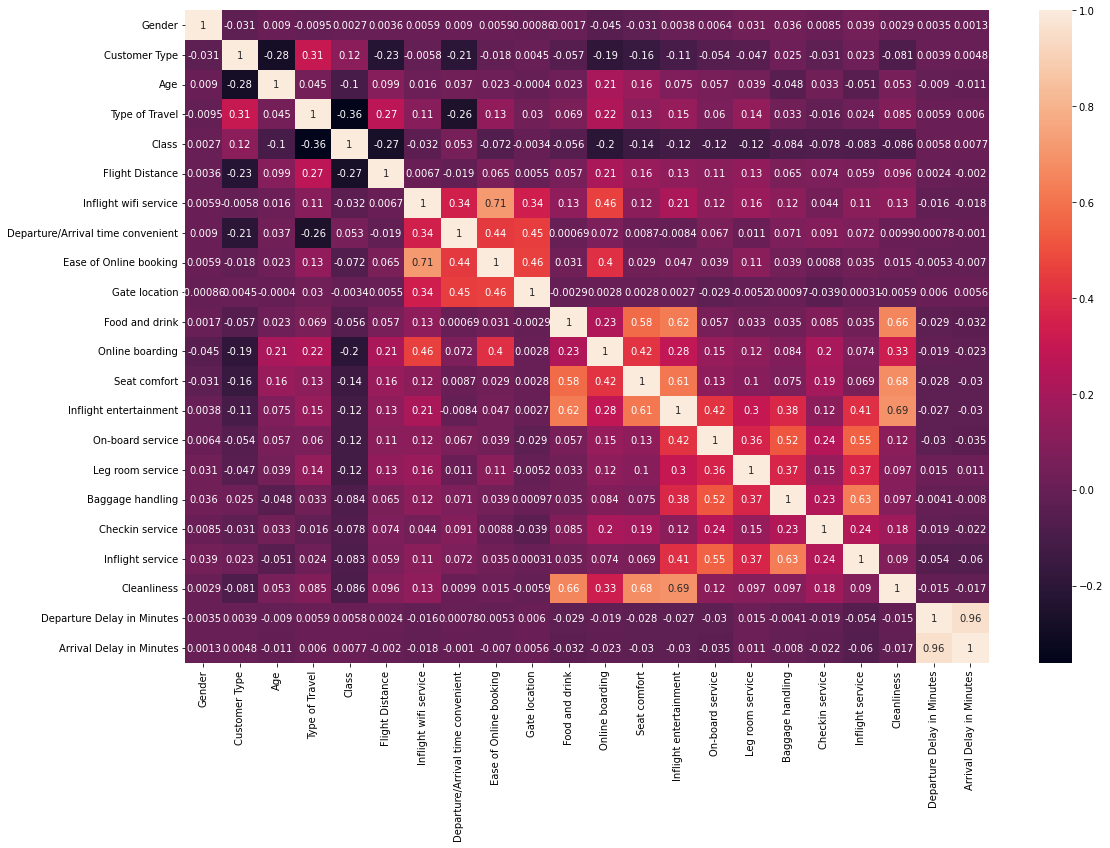

In [7]:
x = data.iloc[:,data.columns != "satisfaction"]
y = data.iloc[:,data.columns == "satisfaction"]
numerical_cols = [col for col in x.columns]
plt.figure(figsize=(18,12))
sns.heatmap(x[numerical_cols].corr(), annot=True)
plt.show()
#看一下相关热图，看看哪些特征与客户满意度有很好的相关性。


In [8]:
std = StandardScaler()

x= std.fit_transform(x)
x = pd.DataFrame(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [8]:
data.columns[0:22]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.139532,1.014878,-0.473422,-1.747961,-1.493951,-2.233947,-0.732184,0.204090,0.617265,0.173445,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,0.076909
1,-1.597453,1.014878,2.112281,-0.954274,0.669366,-0.611012,-0.957760,0.204090,-0.692719,0.173445,...,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,-0.235460
2,1.202554,-0.985340,-0.473422,-0.888133,0.669366,-0.611012,-0.048440,-0.548166,-0.692719,-0.539957,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,-0.391644
3,-1.091253,-0.985340,-0.473422,-0.954274,0.669366,-0.611012,-0.629924,-0.548166,1.272257,1.600249,...,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,-0.157368
4,1.449826,1.014878,-0.473422,1.426788,0.669366,-0.611012,-0.978814,0.204090,-0.037727,0.173445,...,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,-0.391644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.360666,1.014878,2.112281,-0.359008,0.669366,-0.611012,-0.666016,0.204090,-0.037727,0.173445,...,0.423441,0.481186,-0.297587,-1.026310,0.311762,0.547894,1.153946,0.543264,-0.386481,-0.391644
129876,0.166070,1.014878,-0.473422,-1.086555,0.669366,-0.611012,-0.545709,0.956346,0.617265,0.886847,...,0.423441,0.481186,0.479357,1.252898,1.159206,1.337671,1.153946,0.543264,-0.386481,-0.391644
129877,-0.727213,-0.985340,-0.473422,-1.483399,-1.493951,1.011923,-0.363243,-0.548166,1.272257,-1.253359,...,-1.092533,-1.018015,0.479357,-0.266574,0.311762,1.337671,0.304086,-0.979180,-0.386481,-0.391644
129878,0.670670,1.014878,-0.473422,-1.681821,0.669366,-0.611012,-0.063478,0.204090,-0.037727,0.173445,...,0.423441,0.481186,-0.297587,-1.026310,1.159206,0.547894,1.153946,0.543264,-0.386481,-0.391644


看一下相关热图，看看哪些特征与客户满意度有很好的相关性。
最佳特征 - 在线预订、舱位和旅行类型
最差的特征 - 登机口位置、性别和出发/到达时间方便
我们现在将保留所有功能，但如果我们想要删除功能，可以随时返回此步骤。

C:\Users\yjs\AppData\Local\Temp\ipykernel_26980\2169177098.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

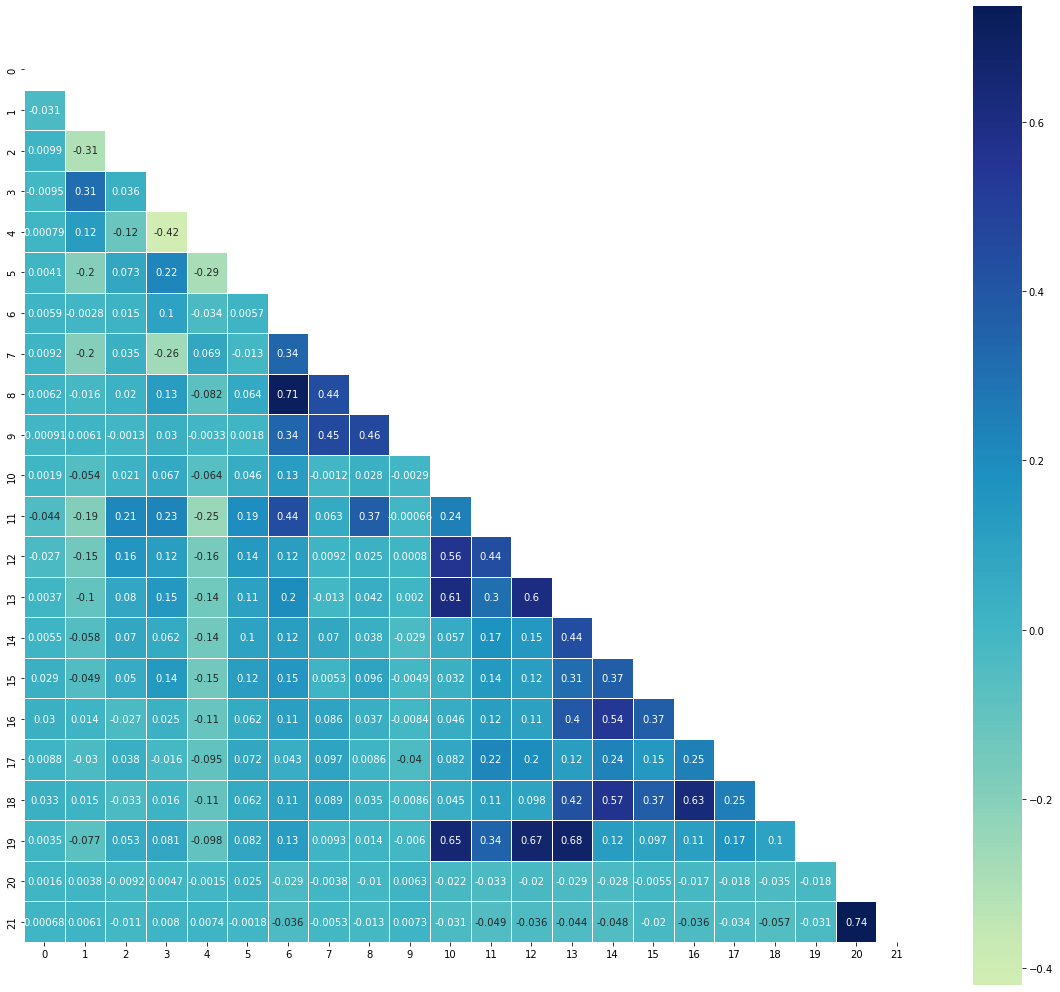

In [11]:
corr = x.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [131]:
x

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.014878,-0.473422,-1.747961,-1.493951,-2.233947,-0.732184,0.204090,0.617265,0.173445,-1.546267,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,0.076909
1,1.014878,2.112281,-0.954274,0.669366,-0.611012,-0.957760,0.204090,-0.692719,0.173445,0.018048,...,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,-0.235460
2,-0.985340,-0.473422,-0.888133,0.669366,-0.611012,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,-0.391644
3,-0.985340,-0.473422,-0.954274,0.669366,-0.611012,-0.629924,-0.548166,1.272257,1.600249,1.582364,...,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,-0.157368
4,1.014878,-0.473422,1.426788,0.669366,-0.611012,-0.978814,0.204090,-0.037727,0.173445,0.018048,...,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,-0.391644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.014878,2.112281,-0.359008,0.669366,-0.611012,-0.666016,0.204090,-0.037727,0.173445,-1.546267,...,0.423441,0.481186,-0.297587,-1.026310,0.311762,0.547894,1.153946,0.543264,-0.386481,-0.391644
129876,1.014878,-0.473422,-1.086555,0.669366,-0.611012,-0.545709,0.956346,0.617265,0.886847,0.800206,...,0.423441,0.481186,0.479357,1.252898,1.159206,1.337671,1.153946,0.543264,-0.386481,-0.391644
129877,-0.985340,-0.473422,-1.483399,-1.493951,1.011923,-0.363243,-0.548166,1.272257,-1.253359,1.582364,...,-1.092533,-1.018015,0.479357,-0.266574,0.311762,1.337671,0.304086,-0.979180,-0.386481,-0.391644
129878,1.014878,-0.473422,-1.681821,0.669366,-0.611012,-0.063478,0.204090,-0.037727,0.173445,0.018048,...,0.423441,0.481186,-0.297587,-1.026310,1.159206,0.547894,1.153946,0.543264,-0.386481,-0.391644


# 监督学习

## 决策树

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",splitter="random",random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_dt = clf.score(Xtest, Ytest)
print(score_dt)

0.9456934606303254


In [21]:
# 画树
import graphviz
dot_data = tree.export_graphviz(clf,feature_names=data.columns[0:22],
                                class_names=["满意","不满意"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph


不同参数下模型的准确率

0.9538420080073914


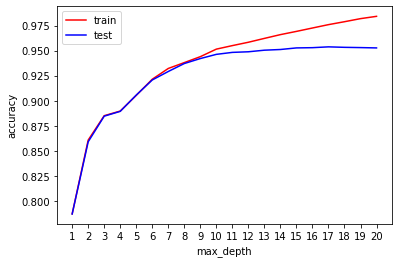

In [44]:

tr = []
te = []
for i in range(20):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,21),tr,color="red",label="train")
plt.plot(range(1,21),te,color="blue",label="test")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(range(1,21))
plt.legend()
plt.show()

0.9537265167847243


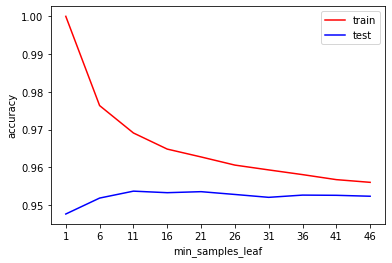

In [36]:
tr = []
te = []
for i in range(1,50,5):
    clf = DecisionTreeClassifier(random_state=25
                                 ,min_samples_leaf=i
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,50,5),tr,color="red",label="train")
plt.plot(range(1,50,5),te,color="blue",label="test")
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(range(1,50,5))
plt.legend()
plt.show()

0.9475900831536803


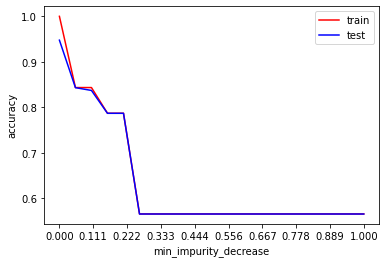

In [45]:

tr = []
te = []
decrease=np.linspace(0,1,20)
xticks=np.linspace(0,1,10)

for i in range(20):
    clf = DecisionTreeClassifier(random_state=25
                                 ,min_impurity_decrease=decrease[i]
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(decrease,tr,color="red",label="train")
plt.plot(decrease,te,color="blue",label="test")
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy')
plt.xticks(xticks)
plt.legend()
plt.show()

## 随机森林

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [77]:
rfc = RandomForestClassifier(criterion="entropy",random_state=90)
rfc = rfc.fit(Xtrain, Ytrain.values.ravel())
score_dt = rfc.score(Xtest, Ytest)
print(score_dt)

0.9619905553844574


0.9618622318037162


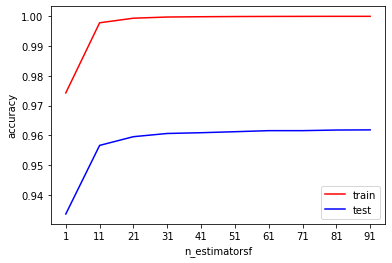

In [82]:
tr = []
te = []
for i in range(1,100,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 criterion="entropy",
                                 n_jobs=-1,
                                 random_state=90)
   
    rfc = rfc.fit(Xtrain,  Ytrain.values.ravel())
    score_tr = rfc.score(Xtrain,Ytrain)
    score_te = rfc.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,100,10),tr,color="red",label="train")
plt.plot(range(1,100,10),te,color="blue",label="test")
plt.xlabel('n_estimatorsf')
plt.ylabel('accuracy')
plt.xticks(range(1,100,10))
plt.legend()
plt.show()

0.9611179550354173


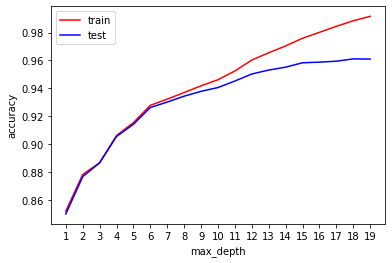

In [87]:
tr = []
te = []
for i in range(1,20,1):
    rfc = RandomForestClassifier(#n_estimators=11,
                                 criterion="entropy",
                                 max_depth=i,
                                 n_jobs=-1,
                                 random_state=90)
   
    rfc = rfc.fit(Xtrain,  Ytrain.values.ravel())
    score_tr = rfc.score(Xtrain,Ytrain)
    score_te = rfc.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,20,1),tr,color="red",label="train")
plt.plot(range(1,20,1),te,color="blue",label="test")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(range(1,20,1))
plt.legend()
plt.show()

0.9619905553844574


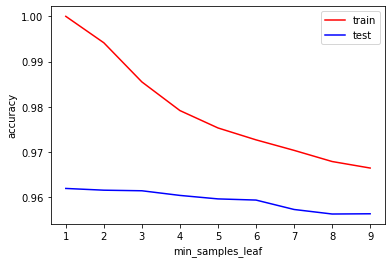

In [88]:
tr = []
te = []
for i in range(1,10,1):
    rfc = RandomForestClassifier(#n_estimators=i+1,
                                 criterion="entropy",
                                 min_samples_leaf=i,
                                 n_jobs=-1,
                                 random_state=90)
   
    rfc = rfc.fit(Xtrain,  Ytrain.values.ravel())
    score_tr = rfc.score(Xtrain,Ytrain)
    score_te = rfc.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,10,1),tr,color="red",label="train")
plt.plot(range(1,10,1),te,color="blue",label="test")
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(range(1,10,1))
plt.legend()
plt.show()

## K邻近算法

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [145]:
knc = KNeighborsClassifier(n_neighbors=20)
knc = knc.fit(Xtrain, Ytrain.values.ravel())
score_dt = knc.score(Xtest, Ytest)
print(score_dt)

0.925700646750847


0.7441741094343497


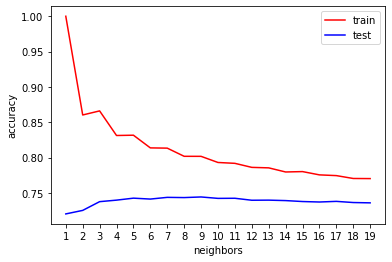

In [97]:
tr = []
te = []
for i in range(1,20,1):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc = knc.fit(Xtrain, Ytrain.values.ravel())
    score_tr = knc.score(Xtrain,Ytrain)
    score_te = knc.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,20,1),tr,color="red",label="train")
plt.plot(range(1,20,1),te,color="blue",label="test")
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.xticks(range(1,20,1))
plt.legend()
plt.show()

## 支持向量积

In [26]:
y_train = np.array(Ytrain).reshape(-1)
y_test = np.array(Ytest).reshape(-1)
from sklearn.svm import SVC
from time import time
import datetime
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot

In [13]:
#探究核函数
Kernel = ["linear","poly","rbf","sigmoid"]
#Kernel = ["rbf"]
for kernel in Kernel:
    print(kernel)
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,y_train )
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

linear
The accuracy under kernel linear is 0.874012
15:07:595389
poly
The accuracy under kernel poly is 0.874063
02:55:366965
rbf
The accuracy under kernel rbf is 0.953752
02:27:646448
sigmoid
The accuracy under kernel sigmoid is 0.787368
03:36:602378


In [27]:
kernel="rbf"
time0 = time()
clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
             ,probability=True
           ).fit(Xtrain,y_train )
print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,y_test)))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel rbf is 0.953650
12:42:372961


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22045
           1       0.96      0.93      0.95     16919

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



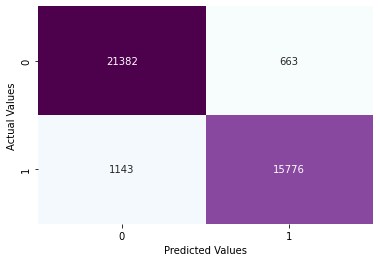

In [28]:
Y_pred = clf.predict(Xtest)
cm = CM(Ytest,Y_pred)
print(classification_report(Ytest,Y_pred))
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [34]:
clf.predict_proba(Xtest)

array([[2.30372043e-01, 7.69627957e-01],
       [9.92581249e-01, 7.41875110e-03],
       [3.25215432e-03, 9.96747846e-01],
       ...,
       [9.98904590e-01, 1.09541001e-03],
       [2.41908768e-02, 9.75809123e-01],
       [1.19160672e-06, 9.99998808e-01]])

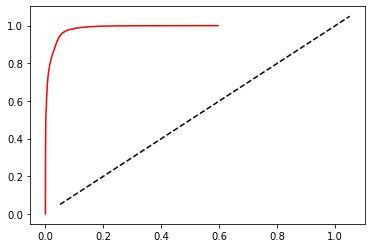

In [29]:
#FPR
cm[1,0]/cm[1,:].sum()
#Recall
cm[0,0]/cm[0,:].sum()
#开始绘图
recall = []
FPR = []
clf_proba=clf.predict_proba(Xtest)
probrange = np.linspace(clf_proba[:,1].min(),clf_proba[:,1].max(),num=10000,endpoint=False)

for i in probrange:
    y_predict = []
    for j in range(Xtest.shape[0]):
        if clf_proba[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(Ytest,y_predict)
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()

In [45]:
probrange
Xtest.shape[0]
FPR

[0.0,
 0.0036632200886262925,
 0.006853766617429837,
 0.010635155096011817,
 0.017311669128508123,
 0.025465288035450517,
 0.0310192023633678,
 0.035096011816838996,
 0.03769571639586411,
 0.03982274741506647,
 0.04183161004431315,
 0.04378138847858198,
 0.04567208271787297,
 0.04709010339734121,
 0.04892171344165436,
 0.0503397341211226,
 0.0521122599704579,
 0.053175775480059084,
 0.05477104874446086,
 0.05589364844903988,
 0.05760709010339734,
 0.058906942392909896,
 0.06032496307237814,
 0.061802067946824225,
 0.06310192023633678,
 0.06487444608567208,
 0.06576070901033973,
 0.06771048744460857,
 0.06918759231905465,
 0.0710192023633678,
 0.07243722304283604,
 0.07385524372230429,
 0.07615952732644017,
 0.07887740029542098,
 0.08183161004431315,
 0.0844903988183161,
 0.08709010339734122,
 0.09057607090103398,
 0.09542097488921714,
 0.09943870014771049,
 0.10451994091580502,
 0.11019202363367799,
 0.11657311669128508,
 0.12579025110782865,
 0.1360709010339734,
 0.15025110782865583,


## 朴素贝叶斯

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix as CM


In [10]:
Yt = np.array(Ytrain).ravel()
gnb = GaussianNB().fit(Xtrain,Yt)
acc_score = gnb.score(Xtest,Ytest)
acc_score



0.8662354994353763

In [11]:
#查看预测结果
Y_pred = gnb.predict(Xtest)
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)
prob.shape
prob.shape #每一列对应一个标签下的概率
prob[1,:].sum() #每一行的和都是一
prob.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

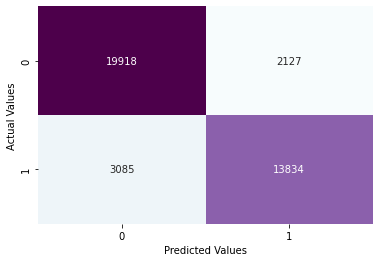

In [20]:
# CM(Ytest,Y_pred)
# Y_pred = clf.predict(Xtest)
cm = CM(Ytest,Y_pred)
# print(classification_report(Ytest,Y_pred))
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

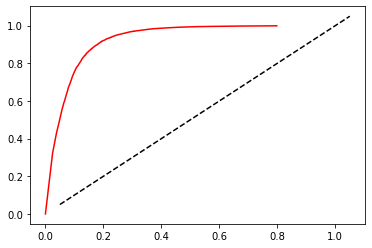

In [25]:
#FPR
cm[1,0]/cm[1,:].sum()
#Recall
cm[0,0]/cm[0,:].sum()
#开始绘图
recall = []
FPR = []
clf_proba=gnb.predict_proba(Xtest)
probrange = np.linspace(clf_proba[:,1].min(),clf_proba[:,1].max(),num=10000,endpoint=False)

for i in probrange:
    y_predict = []
    for j in range(Xtest.shape[0]):
        if clf_proba[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(Ytest,y_predict)
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime
from sklearn.neighbors import KNeighborsClassifier

In [14]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                           ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
           , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color="g",label="Test score")
    ax.legend(loc="best")
    return ax



In [15]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","KNN"] 
model = [GaussianNB(),DTC(),SVC(kernel = 'rbf',  gamma="auto" ,degree = 1, cache_size=5000)
         ,RFC(n_estimators=50),KNeighborsClassifier(n_neighbors=20)]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:02:985795
DecisionTree:00:02:966695
SVM, RBF kernel:03:53:935670
RandomForest:00:22:989242
KNN:03:44:935745


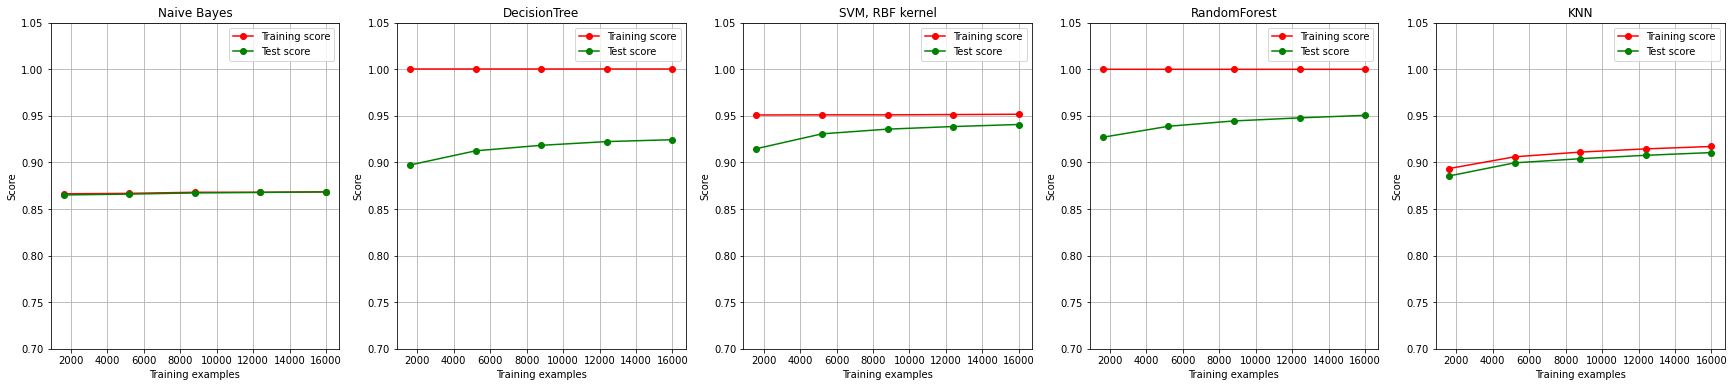

In [17]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, x[:20000], y[:20000],
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-
times).strftime("%M:%S:%f")))
plt.show()

# 无监督学习

## 聚类

## Kmeans clustering



In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def draw_Kmeans_plot(score):
    fig = plt.figure(figsize=(6,4), dpi=100)
    plt.plot((range(2,31,1)),score,color="red")
    plt.xlabel('n_clusters',fontsize=16)
    plt.ylabel("silhouette_score", fontsize=16)
    plt.xticks(range(2,31,2),fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

def plot_Kmeans_clustering(data, kmeans, title):
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


In [175]:
KMeans_data = x.iloc[:5000]

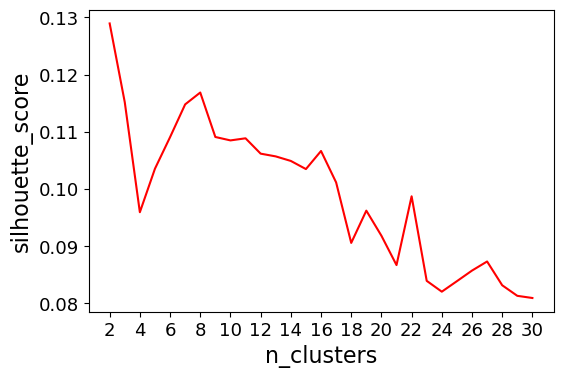

In [176]:
score_list= []
for i in range(2,31,1):
    cluster = KMeans(n_clusters=i, random_state=0).fit(KMeans_data)
    y_pred = cluster.labels_
    score=silhouette_score(KMeans_data,y_pred)
    score_list.append(score)
draw_Kmeans_plot(score_list)

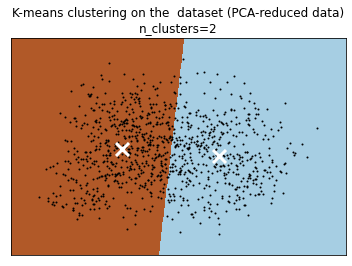

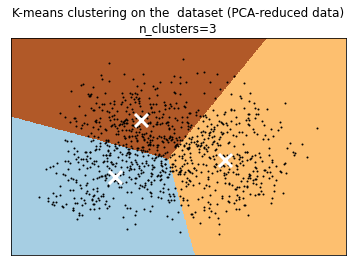

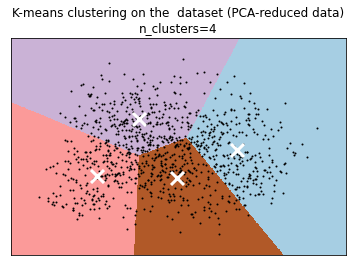

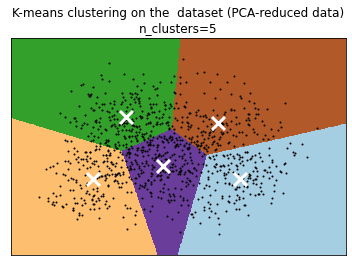

In [165]:
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(KMeans_data)
reduced_data = PCA(n_components=2).fit_transform(kMeans_data)
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10).fit(reduced_data)
plot_Kmeans_clustering(reduced_data,kmeans,"K-means clustering on the  dataset (PCA-reduced data)\nn_clusters=2")
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10).fit(reduced_data)
plot_Kmeans_clustering(reduced_data,kmeans,"K-means clustering on the  dataset (PCA-reduced data)\nn_clusters=3")
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10).fit(reduced_data)
plot_Kmeans_clustering(reduced_data,kmeans,"K-means clustering on the  dataset (PCA-reduced data)\nn_clusters=4")
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10).fit(reduced_data)
plot_Kmeans_clustering(reduced_data,kmeans,"K-means clustering on the  dataset (PCA-reduced data)\nn_clusters=5")


## Hierarchical clustering


In [25]:
from sklearn.cluster import  AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn import manifold
from time import time

def draw_Agglomerative_plot(dict_):
    fig = plt.figure(figsize=(6,4), dpi=100) 
    plt.plot(range(2,16,1),dict_["ward"],color="red",label="ward")
    plt.plot(range(2,16,1),dict_["average"],color="blue",label="average")
    plt.plot(range(2,16,1),dict_["complete"],color="purple",label="complete")
    plt.plot(range(2,16,1),dict_["single"],color="brown",label="single")
    plt.xlabel('n_clusters',fontsize=16)
    plt.ylabel("silhouette_score", fontsize=16)
    plt.xticks(range(2,16,2),fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(prop={"family": "Times New Roman", "size": 13})
    plt.show()

def plot_Agglomerative_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)
    num= len(np.unique(labels))
    plt.figure(figsize=(6, 4))
    for i in range(num):
        plt.scatter(
            *X_red[labels == i].T,
            marker=f"${i}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[ labels == i] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    




def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


In [13]:
Agg_data = x.iloc[:5000]

In [15]:
ac = AgglomerativeClustering(n_clusters=23, affinity='euclidean', linkage='ward')
k = ac.fit(Agg_data )
score=silhouette_score(Agg_data ,k.labels_)
print(score)

0.06626198081423172


In [18]:
dic = {}
for linkage in ("ward", "average", "complete", "single"):
    data=[]
    for n in range(2,16,1):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=n)
        cluster = clustering.fit(Agg_data)
        score=silhouette_score(Agg_data , cluster.labels_)
        data.append(score)
    dic[linkage]=data


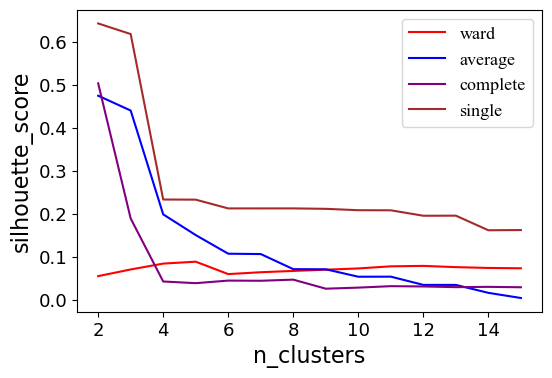

In [19]:
draw_Agglomerative_plot(dic)

Computing embedding
Done.
ward :	0.47s


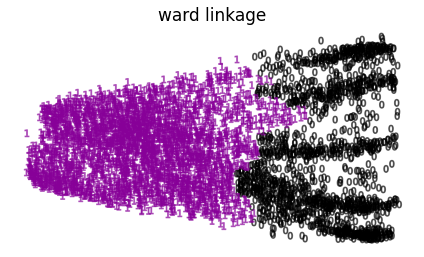

average :	0.37s


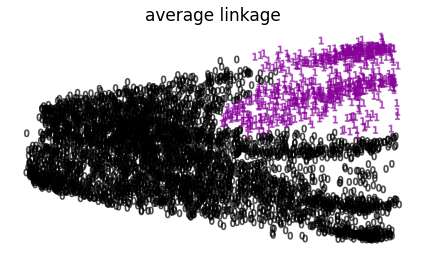

complete :	0.42s


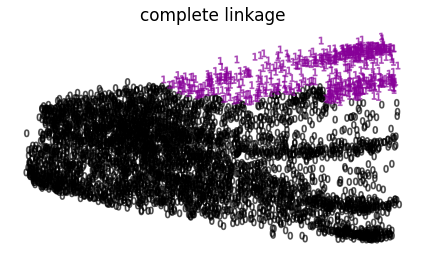

single :	0.10s


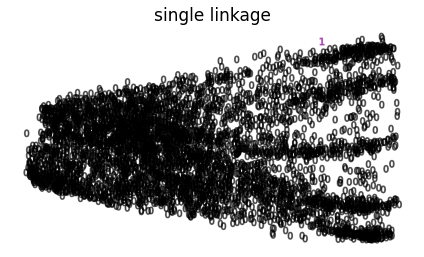

In [27]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(Agg_data )
print("Done.")
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    plot_Agglomerative_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


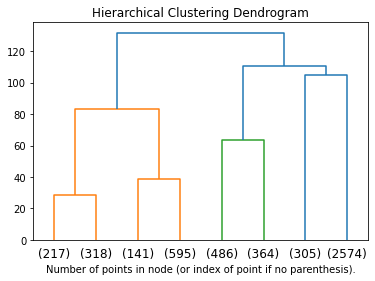

In [28]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(Agg_data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Dbsan clustering

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics


def Dbsan_clustering(data,db):
    unique_labels = set(db.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = labels == k
        xy = data [class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()
    

In [331]:
db_data = x.iloc[:5000]

In [332]:
X_red = PCA(n_components=2).fit_transform(db_data)
db = DBSCAN(eps=0.38, min_samples=30).fit(X_red)
labels = db.labels_
print(labels)
unique_labels = set(labels)
print(unique_labels)
score=silhouette_score(db_data, labels)
print(score)

[0 0 0 ... 0 0 0]
{0, 1, -1}
0.004930239989564888


In [333]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 277


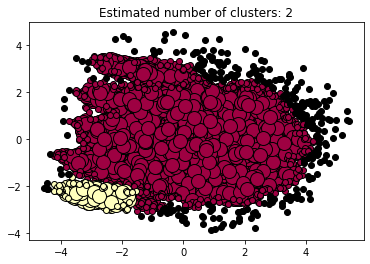

In [334]:
Dbsan_clustering(X_red,db)

# 特征降维

## 主成分分析

In [71]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [72]:
#调用PCA
data1=x.copy()
pca = PCA(n_components=2) #实例化
pca = pca.fit(data1) #拟合模型
X_dr = pca.transform(data1) #获取新矩阵
Y_dr = np.array(y).reshape(-1)

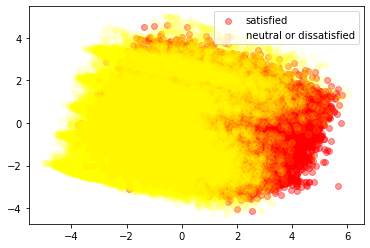

In [73]:
plt.figure()
plt.scatter(X_dr[Y_dr==0, 0], X_dr[Y_dr==0, 1], c="red",norm = 0.9,alpha=0.4, label="satisfied",cmap='autumn')
plt.scatter(X_dr[Y_dr==1, 0], X_dr[Y_dr==1, 1], c="yellow",norm = 0.4, alpha=0.1,label="neutral or dissatisfied")
plt.legend()
#plt.title('PCA of  dataset')
plt.show()

In [74]:
pca.explained_variance_
#百分比，每个特征信息量占原有的百分比
pca.explained_variance_ratio_
#求总
pca.explained_variance_ratio_.sum()


0.2891862240630818

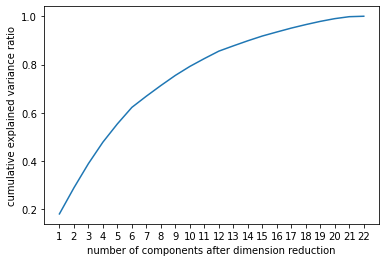

In [75]:
#随着特征选择的越多，累积可解释方差贡献率越大
data2=x.copy()
pca_line = PCA().fit(data2)
b= np.cumsum(pca_line.explained_variance_ratio_)
# print(b)
plt.plot(range(1,23,1),b)
plt.xticks(range(1,23,1)) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [76]:
def bar(y1):
    fig = plt.figure(figsize=(10,6), dpi=100)
    color='tomato'
    #color='cyan'
    plt.bar(range(1,23,1),y1, width=0.4, color= color)
    plt.xticks(range(1,23,1) ,range(1,23,1),fontsize=11)
    plt.xlabel("number of components after dimension reduction",fontsize=13)
    plt.ylabel("cumulative explained variance ratio",fontsize=13)
    for i in range(1,23,1):
        plt.text(i,y1[i-1]+0.02,'%.2f' % y1[i-1], ha="center", va="center",fontsize=9)
    plt.show()

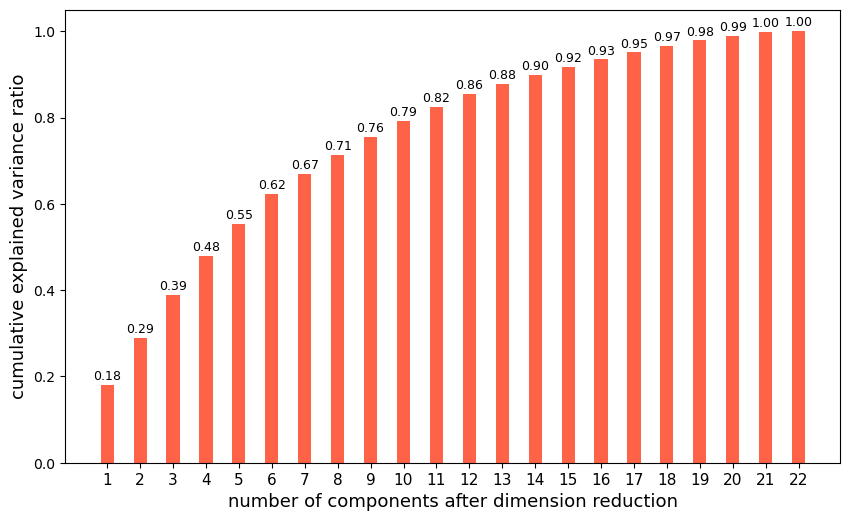

In [77]:
bar(b)

In [ ]:
#让PCA用最大似然估计自选超参数的方法，输入“mle”作为n_components的参数输入，就可以调用这个方法
data3=x.copy()
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(data3)
X_mle = pca_mle.transform(data3)
X_mle.shape

In [ ]:
#可以发现，mle为我们自动选择了21个特征
pca_mle.explained_variance_ratio_.sum()